<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming And Numerical Methods: A Guide For Engineers And Scientists](); the content is available [on GitHub]().*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book]()!*

<!--NAVIGATION-->
< [25.2 Classification](chapter25.02-Classification.ipynb) | [Contents](Index.ipynb) | [25.4 Clustering](chapter25.04-Clustering.ipynb) >

# Regression

Regression is the set of algorithms in supervised learning that the output is quantity numbers instead of categorical data. We have covered least-square regression in chapter 16 for simple cases that we have an analytic form to fit the data. But machine learning approach are more flexible that you can fit any functions of data without knowing the underlying analytic form at all. For example, you can use random forest, artificial neural network, support vector machine and so on to do regression. In this section, we will introduce artificial neural network (ANN) approach, which is a very flexible model that can work on classification and regression easily. 

## Artificial Neural Network Basics
The **artificial neural network** method is developed to try to mimic how our brain works, i.e. neurons in our brain get information and process it, then some process controls whether the neuron will fire a signal to neighboring or specific neurons. The following figure shows a common structure of a multi-layer artificial neural network. It has 3 different layers, i.e. the input layer, the hidden layer, and the output layer. In each layer, there are neurons that are shown as circles in the figure. We can see from the figure that the input layer has 3 neurons in this case as the 3 features input into the network (you can definitely have more features, thus more neurons in the input layer). The middle layer is the hidden layer, you can have many hidden layers as well, in this figure, we only have 1 hidden layer for illustration purposes. The neurons in the hidden layers are the main processing units in the network to process the data, usually in each neuron, it does two things, (1) sum of the information passed from the previous layer, (2) pass the summation of the information to an activation function to decide if it fires a signal. The output layer has neurons as well to generate the output, for classification, it generate a number between 0 and 1, and for regression problem, we can generate any numbers. We see there are many arrows between different layers, these are called links in neural network, they are responsible to pass the information from one layer to another. Each of the link has a weight associated with it, these are the tunable parameters that we can tune the model. When we have information passing in from the input layer, it flows through the links to the hidden layer to get processed and then to the output layer to generate the results. Usually this is called **forward propagation**. 


<img src="images/25.03.01-ANN.png" alt="ANN" title="The structure of an Artificial Neural Network" width="500"/>

As described above, the training of the ANN algorithm is to find a way to tune the weights on each of the links. The way we do this in ANN is to have an objective function that calculate the errors between the model estimations and the true targets. We can first do the forward propagation to get an estimation and calculate the error, and propagate this error backwards from the the output layer to the input layer. Depending on the contributions to the errors for each link, we can update the weights on the links to make sure that next time when we forward pass the information, the error will decrease. This is called **backpropagation**, we can pass the same information forward and backward for multiple times (this is usually called epochs) to continuously decrease the error until it satisfies our goal. This is how we train an ANN algorithm. Usually we use an optimization algorithm called **gradient descent** to update the weights. 

Let's look at an example for ANN in scikit-learn. 

**Generate data** 

First, we need to generate a toy dataset that we will use to train the model. We generate a periodical dataset using two sine wave with different period, and then add some noise to it. It can be visualized in the following figure:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-poster')
%matplotlib inline

<ErrorbarContainer object of 3 artists>

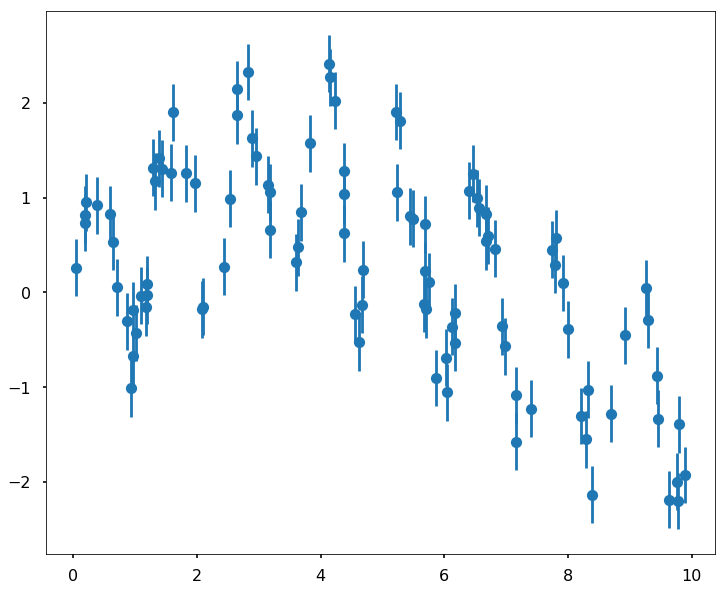

In [2]:
np.random.seed(0)
x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

plt.figure(figsize = (12,10))
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

We can then use ANN to fit the data, the basic idea is that to use each data point in $x$ as the input feature for ANN, and output will be a sequence - $y$. In scikit-learn, the ANN model for regression is *MLPRegressor*, which standards for Multi-layer Perceptron regressor. Let's use the above noisy data as the input into the ANN algorithm.  

In [3]:
from sklearn.neural_network import MLPRegressor

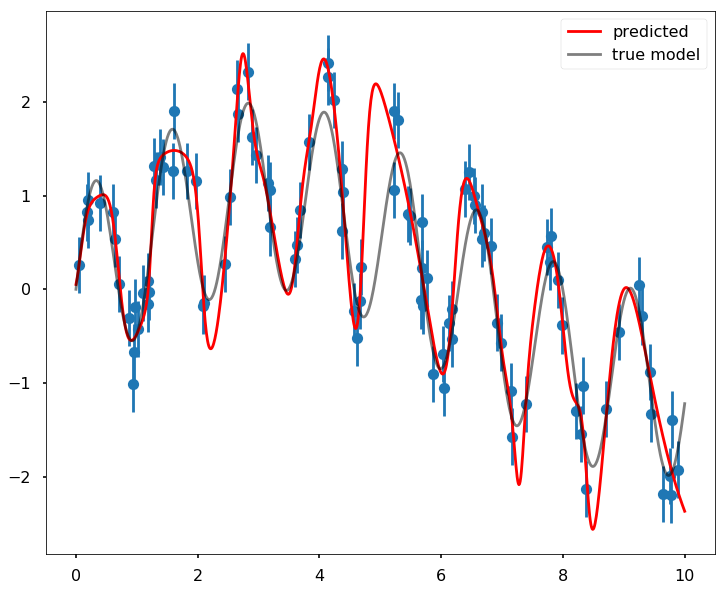

In [4]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), \
                   max_iter = 2000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', \
                   random_state = 8)

xfit = np.linspace(0, 10, 1000)
ytrue = model(xfit, 0)
yfit = mlp.fit(x[:, None], y).predict(xfit[:, None])

plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', \
         zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, \
         label = 'true model', zorder = 10)
plt.legend()
plt.show()

We can see the fitting of the data actually is not bad. For the above model, we used 3 hidden layers and in each layer, we used 200 neurons. We use an optimization algorithm - 'lbfgs', which is an optimizer in the family of quasi-Newton methods. The parameter *max_iter* defines that we will do at most 2000 iterations. 

<!--NAVIGATION-->
< [25.2 Classification](chapter25.02-Classification.ipynb) | [Contents](Index.ipynb) | [25.4 Clustering](chapter25.04-Clustering.ipynb) >